# ANÁLISE DE FUNCIONAMENTO DO MODELO RANDOM FOREST PARA ACEITE DE NAVIOS

In [1]:
#IMPORTANDO BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

## VISUALIZAÇÃO E COMPREENSÃO DOS DADOS

In [2]:
#ABRINDO ARQUIVOS EM DATAFRAMES
df_treino = pd.read_csv('dados_treino.csv')
df_testagem = pd.read_csv('dados_testagem.csv')

In [3]:
#VISUALIZAÇÃO DOS DADOS DE SIMULAÇÃO COM CLASSES 'BALANCEADAS'
df_treino.head(20)

,Unnamed: 0,Nome,LOA (m),Boca (m),DWT (ton),Calado de Entrada (m),Calado de Saída (m),Calado Aéreo (m),Pontal (m),Tamanho de Lança (m),Ano de Construção,Tipo do Navio,Último Porto,Próximo Porto,Situação
0,0,Navio351,19,17,187501,9,15,25,14,103,2017,GSM,Porto45,Porto106,1
1,1,Navio633,39,6,145781,13,11,30,9,88,2022,GS,Porto100,Porto125,0
2,2,Navio508,59,13,57439,17,10,27,17,108,2006,CG,Porto115,Porto176,0
3,3,Navio646,32,14,43275,17,12,28,7,113,2004,CNTR,Porto135,Porto46,1
4,4,Navio92,36,7,192345,11,8,27,6,65,2009,GSM,Porto91,Porto9,1
5,5,Navio267,50,8,37344,18,14,20,18,14,2020,CNTR,Porto6,Porto161,0
6,6,Navio285,26,11,92961,10,10,18,17,89,2007,CNTR,Porto43,Porto39,0
7,7,Navio1035,26,8,133830,15,14,30,12,32,2018,CG,Porto152,Porto186,0
8,8,Navio462,47,8,194312,15,13,24,15,97,2009,GS,Porto179,Porto101,1
9,9,Navio522,45,17,149605,13,12,24,17,84,1998,GL,Porto110,Porto146,1


In [4]:
#VISUALIZAÇÃO DOS DADOS DE SIMULAÇÃO COM CLASSES 'DESBALANCEADAS'
df_testagem.head(20)

,Unnamed: 0,Nome,LOA (m),Boca (m),DWT (ton),Calado de Entrada (m),Calado de Saída (m),Calado Aéreo (m),Pontal (m),Tamanho de Lança (m),Ano de Construção,Tipo do Navio,Último Porto,Próximo Porto,Situação
0,0,Navio3404,32,7,130453,14,18,29,17,84,2022,CG,Porto87,Porto9,0
1,1,Navio2506,30,8,147590,17,18,19,17,29,2008,CG,Porto74,Porto36,0
2,2,Navio3864,24,7,165016,14,19,32,5,30,2016,GS,Porto155,Porto192,1
3,3,Navio3976,18,13,44752,17,10,32,6,107,2011,CNTR,Porto109,Porto152,0
4,4,Navio3277,21,15,138212,17,18,23,11,85,2006,GLP,Porto199,Porto108,0
5,5,Navio2883,55,16,130903,17,18,33,6,35,2014,CG,Porto80,Porto145,0
6,6,Navio2164,35,16,146510,14,13,14,5,51,2006,GSM,Porto53,Porto40,0
7,7,Navio2515,42,14,128831,8,17,12,15,110,2013,CNTR,Porto194,Porto115,0
8,8,Navio3092,24,17,137622,12,14,32,19,22,2007,CNTR,Porto190,Porto51,0
9,9,Navio3919,55,17,78977,16,18,21,10,111,2017,CNTR,Porto61,Porto43,0


In [5]:
#INFOS SOBRE TIPAGEM DE DADOS 
print(df_testagem.info())
print(df_treino.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             1000 non-null   int64 
 1   Nome                   1000 non-null   object
 2   LOA (m)                1000 non-null   int64 
 3   Boca (m)               1000 non-null   int64 
 4   DWT (ton)              1000 non-null   int64 
 5   Calado de Entrada (m)  1000 non-null   int64 
 6   Calado de Saída (m)    1000 non-null   int64 
 7   Calado Aéreo (m)       1000 non-null   int64 
 8   Pontal (m)             1000 non-null   int64 
 9   Tamanho de Lança (m)   1000 non-null   int64 
 10  Ano de Construção      1000 non-null   int64 
 11  Tipo do Navio          1000 non-null   object
 12  Último Porto           1000 non-null   object
 13  Próximo Porto          1000 non-null   object
 14  Situação               1000 non-null   int64 
dtypes: int64(11), object(4

In [6]:
# EXCLUINDO COLUNA ERRÔNEA DOS DADOS
df_treino = df_treino.drop(columns=['Unnamed: 0'])
df_testagem = df_testagem.drop(columns=['Unnamed: 0'])

In [7]:
#df_testagem
df_treino

,Nome,LOA (m),Boca (m),DWT (ton),Calado de Entrada (m),Calado de Saída (m),Calado Aéreo (m),Pontal (m),Tamanho de Lança (m),Ano de Construção,Tipo do Navio,Último Porto,Próximo Porto,Situação
0,Navio351,19,17,187501,9,15,25,14,103,2017,GSM,Porto45,Porto106,1
1,Navio633,39,6,145781,13,11,30,9,88,2022,GS,Porto100,Porto125,0
2,Navio508,59,13,57439,17,10,27,17,108,2006,CG,Porto115,Porto176,0
3,Navio646,32,14,43275,17,12,28,7,113,2004,CNTR,Porto135,Porto46,1
4,Navio92,36,7,192345,11,8,27,6,65,2009,GSM,Porto91,Porto9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Navio243,48,12,151668,8,19,30,12,112,2004,CG,Porto5,Porto159,1
996,Navio411,22,8,95318,16,10,28,19,12,2001,GL,Porto107,Porto184,1
997,Navio315,23,12,76514,11,19,22,5,50,2010,GL,Porto31,Porto188,1
998,Navio225,18,7,42813,13,10,11,12,111,2007,GSM,Porto188,Porto79,0


In [8]:
#BALANCEAMENTO DE CLASSE DO DATAFRAME DE TREINO
df_treino['Situação'].value_counts() #TREINAMENTO DO MODELO COM CLASSES BALANCEADAS

Situação
1    500
0    500
Name: count, dtype: int64

## TRATAMENTO DOS DADOS E CONFIGURAÇÃO DO MODELO

In [9]:
#DEFINIÇÃO DOS PREVISORES E CLASSES
indices_previsores = [1, 2, 3, 4, 5, 9]
#LOA, BOCA, DWT, CALADO DE ENTRADA, CALADO DE SAÍDA, ANO DE CONSTRUÇÃO

previsores_treino = df_treino.iloc[:, indices_previsores].values
classe_treino = df_treino.iloc[:, 13].values

previsores_testagem = df_testagem.iloc[:, indices_previsores].values
classe_testagem = df_testagem.iloc[:, 13].values

previsores_testagem

array([[    32,      7, 130453,     14,     18,   2022],
       [    30,      8, 147590,     17,     18,   2008],
       [    24,      7, 165016,     14,     19,   2016],
       ...,
       [    59,     10, 131855,     16,     11,   2007],
       [    26,     11, 114065,     11,     10,   2015],
       [    17,     10, 126645,     13,     11,   2015]], dtype=int64)

In [30]:
#SEPARANDO DADOS DE TESTE E TREINO
# p -> previsores / c -> classe
# b -> balanceados / d -> desbalanceados
pb_train, pb_test, cb_train, cb_test = train_test_split(previsores_treino, classe_treino, train_size=0.25)
pd_train, pd_test, cd_train, cd_test = train_test_split(previsores_testagem, classe_testagem, test_size=999)


In [11]:
# PARAMETROS DE BUSCA GRID SEARCH SE BASEANDO EM RANDOM FOREST
parametros = {
    'criterion':['gini','entropy'],
    'n_estimators': [10, 20, 30, 40],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima de cada árvore
    'min_samples_split': [2, 5, 7, 10],  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 3, 4],  # Número mínimo de amostras necessárias em uma folha
    'bootstrap': [True, False]  # Se deve amostrar com substituição
}


In [12]:
# CRIAÇÃO DO CLASSIFICADOR BASE
classificador_base = RandomForestClassifier(random_state=0)

In [36]:
# CONFIGURANDO GRIDSEARCHCV PARA MELHOR ESCOLHA DOS HIPERPARÂMETROS
grid_search = GridSearchCV(classificador_base, parametros, cv=5, scoring='precision')

In [37]:
# EXECUTANDO A BUSCA EXAUSTIVA
grid_search.fit(pb_train, cb_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30, 40]},
             scoring='precision')

In [15]:
# OBTENDO MELHORES PARÂMETROS
melhores_parametros = grid_search.best_params_
melhores_parametros

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [ ]:
#{'bootstrap': False,
#'criterion': 'gini',
#'max_depth': None,
#'max_features': 'sqrt',
#'min_samples_leaf': 1,
#'min_samples_split': 2,
#@'n_estimators': 10}

#{'bootstrap': True,
#'criterion': 'gini',
#'max_depth': None,
#'max_features': 'sqrt',
#'min_samples_leaf': 1,
#'min_samples_split': 10,
#'n_estimators': 10}

'''
    bootstrap=True,
    criterion='gini',
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=10
'''

'''
{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}
'''

'''
{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}
'''

In [89]:
# CLASSIFICADOR COM PARÂMETROS ADVINDOS DO GRID SEARCH
classificador = RandomForestClassifier(
    bootstrap=True,
    criterion='gini',
    max_features='sqrt',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=20
)


## TREINAMENTO DO MODELO 'A' COM DADOS DE SIMULAÇÃO 'BALANCEADOS'

In [90]:
classificador.fit(pb_train, cb_train)

RandomForestClassifier(n_estimators=20)

In [91]:
previsoes_balanceadas_a = classificador.predict(pb_test)

## AVALIAÇÃO DO MODELO 'A' COM DADOS DE SIMULAÇÃO 'BALANCEADOS'

In [92]:
def calcular_especificidade(matriz):
    vn = matriz[1,1]
    soma_vn_fp = matriz[0,1] + matriz[1,1]
    especificidade = vn / soma_vn_fp
    
    return especificidade

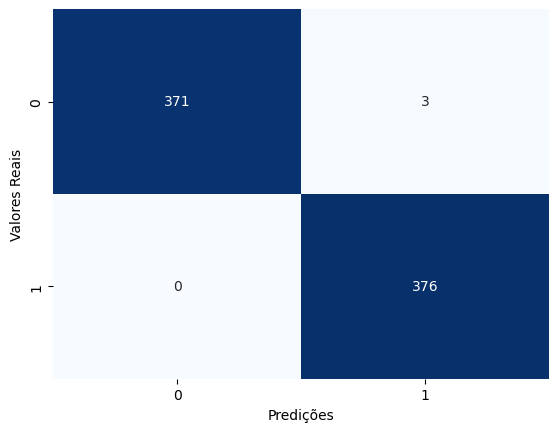

MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):
 [[371   3]
 [  0 376]]

ACURÁCIA: 0.996

PRECISÃO: 0.9920844327176781

SENSIBILIDADE/ RECALL: 1.0

F1-SCORE: 0.9960264900662251

ESPECIFICIDADE:  0.9920844327176781


In [93]:
# AVALIAÇÃO DO MODELO
matriz_confusao_a = confusion_matrix(cb_test, previsoes_balanceadas_a)
sns.heatmap(matriz_confusao_a, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predições")
plt.ylabel("Valores Reais")
plt.show()

acuracia = accuracy_score(cb_test, previsoes_balanceadas_a)
precisao = precision_score(cb_test, previsoes_balanceadas_a)
recall = recall_score(cb_test, previsoes_balanceadas_a)
f1score = f1_score(cb_test, previsoes_balanceadas_a)
especificidade = calcular_especificidade(matriz_confusao_a)

print("MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):\n", matriz_confusao_a)
print("\nACURÁCIA:", acuracia)
print("\nPRECISÃO:", precisao)
print("\nSENSIBILIDADE/ RECALL:", recall)
print("\nF1-SCORE:", f1score)
print("\nESPECIFICIDADE: ", especificidade)


In [94]:
resultados_acuracia = cross_val_score(classificador, previsores_treino, classe_treino, cv=5, scoring='accuracy')
resultados_precisao = cross_val_score(classificador, previsores_treino, classe_treino, cv=5, scoring='precision')
resultados_recall = cross_val_score(classificador, previsores_treino, classe_treino, cv=5, scoring='recall')
resultados_f1score = cross_val_score(classificador, previsores_treino, classe_treino, cv=5, scoring='f1')

print("Resultados Acurácia: ", resultados_acuracia)
print("Acurácia média: ", np.mean(resultados_acuracia))
print("\n")

print("Resultados Precisao: ", resultados_precisao)
print("Precisao média: ", np.mean(resultados_precisao))
print("\n")

print("Resultados Recall: ", resultados_recall)
print("Precisao média: ", np.mean(resultados_recall))
print("\n")

print("Resultados f1-score: ",resultados_f1score)
print("Precisão média: ", np.mean(resultados_f1score))

Resultados Acurácia:  [0.995 1.    1.    1.    0.995]
Acurácia média:  0.998


Resultados Precisao:  [1.         1.         1.         1.         0.99009901]
Precisao média:  0.998019801980198


Resultados Recall:  [1. 1. 1. 1. 1.]
Precisao média:  1.0


Resultados f1-score:  [0.99502488 1.         1.         1.         0.99502488]
Precisão média:  0.9980099502487562


## AVALIAÇÃO DO MODELO 'A' COM DADOS DE SIMULAÇÃO 'DESBALANCEADOS'

In [95]:
previsoes_desbalanceadas_a = classificador.predict(pd_test)

In [96]:
# AVALIAÇÃO DO MODELO
matriz_confusao = confusion_matrix(cd_test, previsoes_desbalanceadas_a)
acuracia = accuracy_score(cd_test, previsoes_desbalanceadas_a)
precisao = precision_score(cd_test, previsoes_desbalanceadas_a)
recall = recall_score(cd_test, previsoes_desbalanceadas_a)
f1score = f1_score(cd_test, previsoes_desbalanceadas_a)
especificidade = calcular_especificidade(matriz_confusao)

print("MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):\n", matriz_confusao)
print("\nACURÁCIA:", acuracia)
print("\nPRECISÃO:", precisao)
print("\nSENSIBILIDADE/ RECALL:", recall)
print("\nF1-SCORE:", f1score)
print("ESPECIFICIDADE: ",especificidade)


MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):
 [[786  13]
 [  0 200]]

ACURÁCIA: 0.986986986986987

PRECISÃO: 0.9389671361502347

SENSIBILIDADE/ RECALL: 1.0

F1-SCORE: 0.9685230024213075
ESPECIFICIDADE:  0.9389671361502347


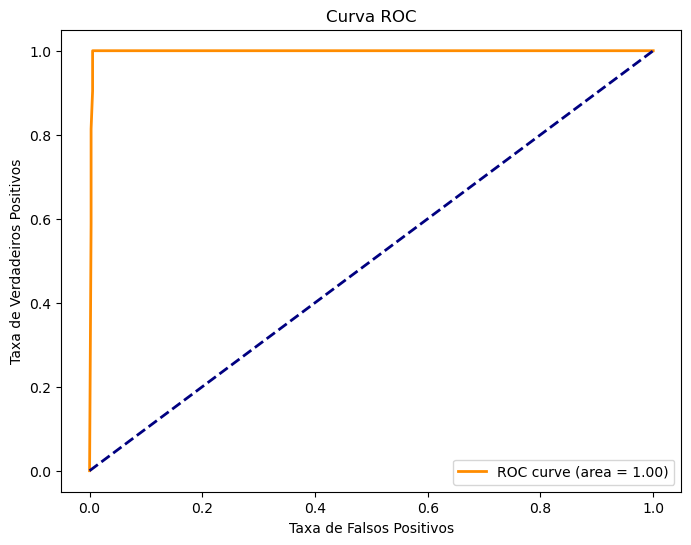

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Treine o modelo novamente com os melhores hiperparâmetros encontrados
classificador_roc = RandomForestClassifier(**melhores_parametros)

# Treine o modelo com os dados balanceados
classificador_roc.fit(pb_train, cb_train)

# Obtenha as probabilidades previstas para a classe positiva (classe "0")
probabilidades_positivas = classificador_roc.predict_proba(pb_test)[:, 1]

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(cb_test, probabilidades_positivas)

# Calcule a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Visualize a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# TREINAMENTO DO MODELO 'B' COM DADOS DESBALANCEADOS

In [ ]:
classificador_b = RandomForestClassifier(# CLASSIFICADOR COM PARÂMETROS ADVINDOS DO GRID SEARCH
    **melhores_parametros
)

In [ ]:
# SEPARANDO CONJUNTOS DE DADOS PARA TREINO E TESTE 
pb_train, pb_test, cb_train, cb_test = train_test_split(previsores_treino, classe_treino, test_size=999)
pd_train, pd_test, cd_train, cd_test = train_test_split(previsores_testagem, classe_testagem, train_size=0.25)

In [ ]:
# TREINANDO CLASSIFICADOR COM DADOS DESBALANCEADOS
classificador_b.fit(pd_train, cd_train)

In [ ]:
# APLICANDO PREDIÇÕES EM BASE PRÓPRIA DE TSTES DESBALANCEADOS
previsoes_desbalanceadas_b = classificador_b.predict(pd_test) 
previsoes_desbalanceadas_b

# AVALIAÇÃO DO MODELO 'B' COM DADOS DESBALANCEADOS 

In [ ]:
# AVALIAÇÃO DO MODELO
matriz_confusao_b = confusion_matrix(cd_test, previsoes_desbalanceadas_b)
sns.heatmap(matriz_confusao_b, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predições")
plt.ylabel("Valores Reais")
plt.show()

acuracia = accuracy_score(cd_test, previsoes_desbalanceadas_b)
precisao = precision_score(cd_test, previsoes_desbalanceadas_b)
recall = recall_score(cd_test, previsoes_desbalanceadas_b)
f1score = f1_score(cd_test, previsoes_desbalanceadas_b)
especificidade = calcular_especificidade(matriz_confusao_b)

print("MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):\n", matriz_confusao_b)
print("\nACURÁCIA:", acuracia)
print("\nPRECISÃO:", precisao)
print("\nSENSIBILIDADE/ RECALL:", recall)
print("\nF1-SCORE:", f1score)
print("\nESPECIFICIDADE: ", especificidade)

## AVALIAÇÃO DO MODELO 'B' COM DADOS BALANCEADOS

In [ ]:
# PREVISOES COM BASE NO CONJUNTO DE TESTAGEM COM DADOS BALANCEADOS
previsoes_balanceadas_b = classificador_b.predict(pb_test)

In [ ]:
# AVALIAÇÃO DO MODELO EM RELAÇÃO AOS DADOS BALANCEADOS (500-500)
# AVALIAÇÃO DO MODELO
matriz_confusao_b = confusion_matrix(cb_test, previsoes_balanceadas_b)
sns.heatmap(matriz_confusao_b, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predições")
plt.ylabel("Valores Reais")
plt.show()

acuracia = accuracy_score(cb_test, previsoes_balanceadas_b)
precisao = precision_score(cb_test, previsoes_balanceadas_b)
recall = recall_score(cb_test, previsoes_balanceadas_b)
f1score = f1_score(cb_test, previsoes_balanceadas_b)
especificidade = calcular_especificidade(matriz_confusao_b)

print("MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):\n", matriz_confusao_b)
print("\nACURÁCIA:", acuracia)
print("\nPRECISÃO:", precisao)
print("\nSENSIBILIDADE/ RECALL:", recall)
print("\nF1-SCORE:", f1score)
print("\nESPECIFICIDADE: ", especificidade)